# SIT744 Assignment 2: Transfer learning and Efficient Training of Deep Learning Models 

<div class="alert-info">
    <p>Due: <strong>8:00pm 17 May 2021</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~15%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to achieve better image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~1%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [15]:
import tensorflow as tf
import tensorflow_datasets
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History


# Loading the data using tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
# train, test and validation splits

# defining batch size
BATCH_SIZE = 512
# training dataset
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))


# test dataset
fmnist_test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
fmnist_test_ds = fmnist_test_ds.shuffle(5000).batch(BATCH_SIZE)

# picking out the validation set from the training dataset
fmnist_train = fmnist_train_ds.take(round(len(train_labels)*0.7))
fmnist_val = fmnist_train_ds.skip(round(len(train_labels)*0.7))


# batch size should be in powers of 2 and the larger the better, provided that the batch fits into the (GPU) memory;
# small batches can offer a regularizing effect, perhaps due to the noise they add to the learning process.
# larger batches provide a more accurate estimate of the gradient.
# the batch size here is 512.
# train-data shuffling ensures that the model gets to see all permutauions of input in every batch.

In [17]:
# adding dropout, batch normalisation, changing the learning rate

def optimiser_sgd(learning_rate):
  learning_rate = learning_rate
  decay_rate = learning_rate / 50
  momentum = 0.8

  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  return sgd

In [18]:

decay_rate = 0.001
learning_rate = 0.001

def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

In [23]:
# Different layers are appropriate for different tensor formats and different types of data processing. 
# Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers.

# single-label, multiclass classification problem

model_d = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model_d.compile(optimizer=optimiser_sgd(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/12
83/83 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.9170 - val_loss: 0.7356 - val_accuracy: 0.8832
Epoch 2/12
83/83 [==============================] - 0s 5ms/step - loss: 0.6473 - accuracy: 0.9174 - val_loss: 0.7322 - val_accuracy: 0.8844
Epoch 3/12
83/83 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.9169 - val_loss: 0.7272 - val_accuracy: 0.8852
Epoch 4/12
83/83 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.9191 - val_loss: 0.7257 - val_accuracy: 0.8842
Epoch 5/12
83/83 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.9191 - val_loss: 0.7394 - val_accuracy: 0.8801
Epoch 6/12
83/83 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.9155 - val_loss: 0.7270 - val_accuracy: 0.8817
Epoch 7/12
83/83 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.9179 - val_loss: 0.7209 - val_accuracy: 0.8852
Epoch 8/12
83/83 [==

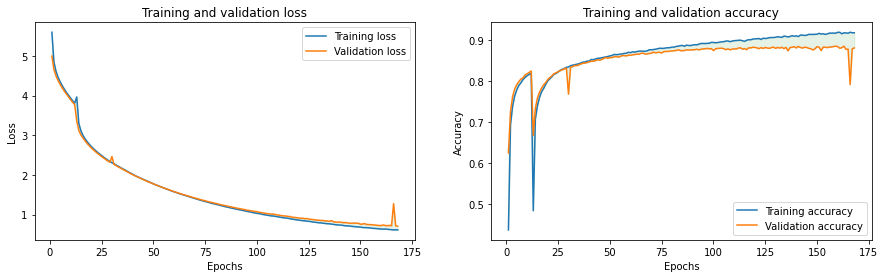

In [38]:
regularised_layers_model_history = model_d.fit(train_images, 
                                     train_labels,
                                     validation_split=0.3,
                                     batch_size=512,
                                     epochs=12,
                                    callbacks = callbacks_list)

acc = regularised_layers_model_history.history['accuracy']
val_acc = regularised_layers_model_history.history['val_accuracy']
loss = regularised_layers_model_history.history['loss']
val_loss = regularised_layers_model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
test_loss, test_accuracy = model_d.evaluate(test_images, test_labels, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset after layer specific weight regularisation:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.7424 - accuracy: 0.8719
Accuracy on test dataset after layer specific weight regularisation: 0.8719000220298767


Without changine the model architecture, the accuracy improves only by a few decimal poitns depending on the learning rate, the regularisers and the Dropouts.

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 




### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~3%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



### Task 1.5 Performance comparison

*(weight ~3%)*

How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?


Which setting achieved higher accuracy? Why did it work better for this problem? 

Have we benefitted from using the pretrained model?


## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also, Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*

Today, ResNet has become a very mature ConvNet architecture. In this task, you will research one recent ConvNet architecture. You may choose an architecture from the reference list below.

Write a short report for your research, covering these points:

- Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)
- What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?

Implement the architecture and compare its performance on CIFAR10 with ResNet. You may include your implementation, experiments, and analyses here in this notebook.

**References**:

1. Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
2. Zhang X, Zhou X, Lin M, Sun J. *Shufflenet: An extremely efficient convolutional neural network for mobile devices*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 6848-6856).
3. Tan M, Le Q. *Efficientnet: Rethinking model scaling for convolutional neural networks*. In International Conference on Machine Learning 2019 May 24 (pp. 6105-6114). PMLR.
4. Hu J, Shen L, Sun G. *Squeeze-and-excitation networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 7132-7141).


---
**END OF ASSIGNMENT TWO**